In [ ]:
# Generating ground truth

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# ---------------------------
# Configuration & Constants
# ---------------------------
sigma = 10
beta = 8 / 3
rho = 28

dt = 0.025
maxtime = 100

maxtime_pts = int(maxtime / dt)  # 400 steps of 0.25
t_eval = np.linspace(0, maxtime, maxtime_pts + 1)  # 401 time points

y0 = [-8.0, 7.0, 27.0]


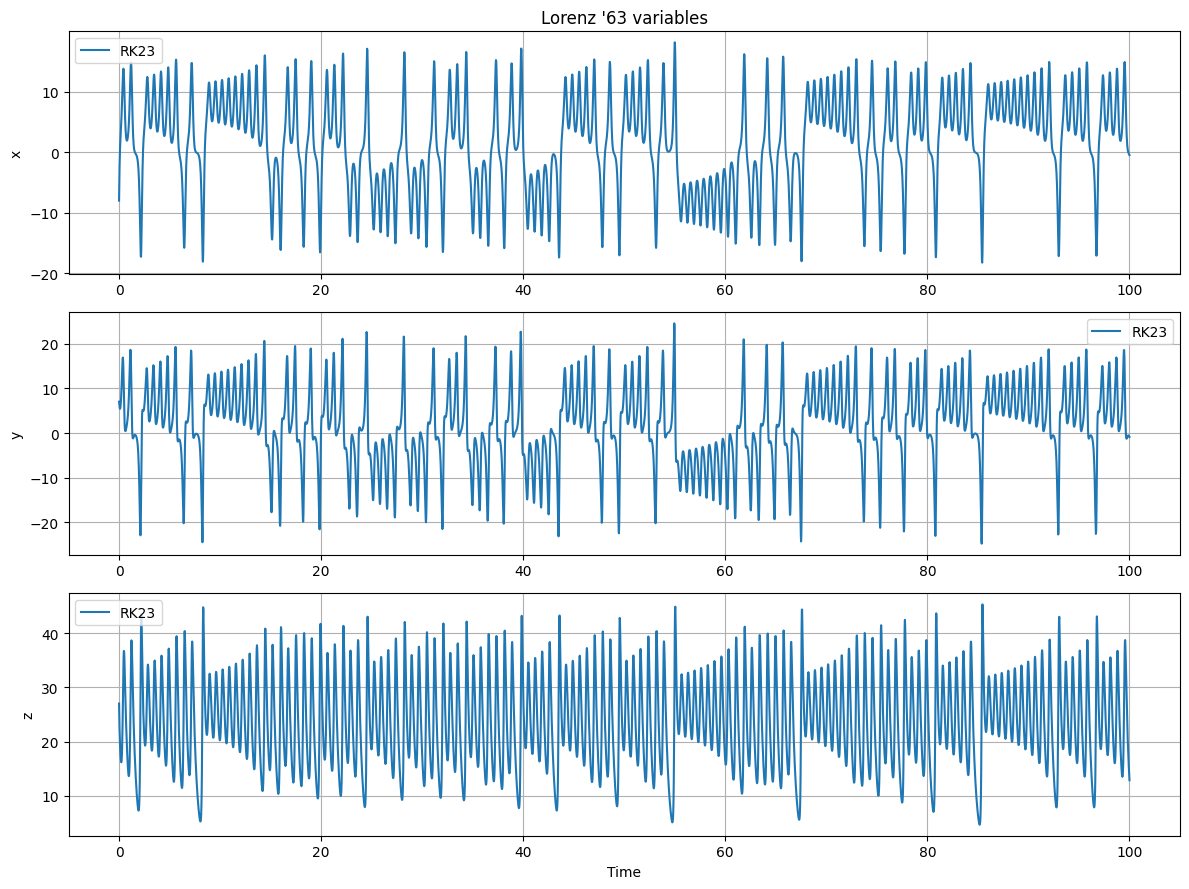

In [4]:
# ---------------------------
# Lorenz '63 System
# ---------------------------
def lorenz(t, y):
    dy0 = sigma * (y[1] - y[0])
    dy1 = y[0] * (rho - y[2]) - y[1]
    dy2 = y[0] * y[1] - beta * y[2]
    return [dy0, dy1, dy2]

sol_rk23 = solve_ivp(lorenz, (0, maxtime), y0, t_eval=t_eval, method='RK23')
lorenz_rk23 = sol_rk23.y  # shape (3, time)
np.save("ground_truth", lorenz_rk23)
Lorenz63data = lorenz_rk23.T

# ---------------------------
# Visualization
# ---------------------------
variables = ['x', 'y', 'z']
plt.figure(figsize=(12, 9))
for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.plot(t_eval, lorenz_rk23[i], label='RK23', color='C0')
    plt.ylabel(variables[i])
    plt.grid(True)
    if i == 0:
        plt.title("Lorenz '63 variables")
    if i == 2:
        plt.xlabel('Time')
    plt.legend()
plt.tight_layout()
plt.show()